
---


# *Name*: Ishak Hafdallah


---




# ***Explanatory Data Analysis For Football Players Dataset***

# ***BUSINESS CONTEXT***


Working as a data science consultant for Real Madrid Football Club is clear that the club values, the importance of utilizing data driven methods in player recruitment. Real Madrid, known as one of the football clubs is always looking to strengthen their team with top talents to stay competitive.

### **Data Description**:

The dataset given is a is a dataset that can be found in [Kaggle](https://www.kaggle.com/datasets/maso0dahmed/football-players-data)

As a data science consultant at Real Madrid Football Club consists of information about around 17,000 FIFA football players. This data has been carefully gathered from [SoFIFA](https://SoFIFA.com), a trusted source for player statistics and ratings in the FIFA video game series.

###**Why They need me as Data Scientist :**

Real Madrids decision to seek guidance from me as data scientist reflects their dedication to improving player recruitment strategies. By applying analytics techniques I can uncover insights from the dataset helping Real Madrid make well informed decisions regarding player signings. My role involves analyzing the data identifying trends and offering recommendations to assist Real Madrid in their recruitment efforts. Ultimately contribute to the clubs ongoing success





# ***DATA EXPLORATION***

First we will import the libraries needed

In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

>Here im Reading the dataset and show the first 5 rows of it and the number of Rows and Columns



In [2]:
data = pd.read_csv('fifa_players 2.csv')
df=data.copy()
print("Rows :",df.shape[0])
print("Columns :",df.shape[1])
print("First 5 rows:")
df.head()

Rows : 17954
Columns : 51
First 5 rows:


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


>The dataset contain a total of 51 columns, 7 of them floats, 35 integers, and 9 objects


>The size of the dataset is approximately 7MB


>There is 17,954 player stats recorded in this dataset

>Columns like "national_jersey_number," "national_team_position," "national_rating," and "national_team" have a significant number of missing values, Considering this, i will consider  to drop these columns


>Other columns, like  "release_clause_euro," "value_euro," and "wage_euro," contain some missing values. i will fill these missing values with the mean of each column


>There are 28 features (from columns 22 to 50) that represent various skills for each player, like dribbling and others.


In [3]:
print("\nData types:")
df.info()


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17

>This summary statistics are split into two sections, for readability because the numbers for "value " "wage," and "release clause" are quite large and are shown in notation, which can be hard to understand.

>The range of ratings shows a range of skill levels among players with overall ratings varying from 47 to 94 and potential ratings ranging from 48 to 95.

>The interquartile range (25th to 75th percentile) indicates that players in the fall between the ages of 22 and 29.

>The average international reputation rating is relatively low at around 1.11 suggesting that most players have limited recognition on a scale.

>Even though the average overall and potential ratings are fairly high indicating a moderate to skill level, among players the average international reputation rating remains low. This implies that while players may have talent they may not gain recognition at the international level.







In [4]:
print("\nSummary statistics:")
df[['skill_moves(1-5)', 'weak_foot(1-5)', 'international_reputation(1-5)', 'potential', 'overall_rating', 'weight_kgs', 'height_cm', 'age']].describe().T


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
skill_moves(1-5),17954.0,2.361034,0.763223,1.0,2.00,2.00,3.00,5.00
weak_foot(1-5),17954.0,2.945695,0.663691,1.0,3.00,3.00,3.00,5.00
international_reputation(1-5),17954.0,1.111674,0.392168,1.0,1.00,1.00,1.00,5.00
potential,17954.0,71.430935,6.131339,48.0,67.00,71.00,75.00,95.00
overall_rating,17954.0,66.240169,6.963730,47.0,62.00,66.00,71.00,94.00
weight_kgs,17954.0,75.301047,7.083684,49.9,69.90,74.80,79.80,110.20
height_cm,17954.0,174.946921,14.029449,152.4,154.94,175.26,185.42,205.74
age,17954.0,25.565445,4.705708,17.0,22.00,25.00,29.00,46.00


* The average release clause €4,622,522 is notably higher than the average weekly wage €9,902. This implies that clubs are willing to pay a much higher amount to secure players in the transfer than what players make on a weekly basis.

* The distribution of market values is kind of  skewed, with a mean value €2,479,280 being higher than the median value €700K. This suggests that there are some players with very high market values, pulling the mean up


In [5]:
df[['value_euro', 'wage_euro',  'release_clause_euro']].describe().T

,count,mean,std,min,25%,50%,75%,max
value_euro,17699.0,2.479280e+06,5.687014e+06,10000.0,325000.0,700000.0,2100000.0,110500000.0
wage_euro,17708.0,9.902135e+03,2.199559e+04,1000.0,1000.0,3000.0,9000.0,565000.0
release_clause_euro,16117.0,4.622522e+06,1.129077e+07,13000.0,525000.0,1200000.0,3500000.0,226500000.0


Here i checked the columns that has a missing values, we can see that there's a huge number of missing values in some columns, we will handel them in the Preprocessing part

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

value_euro                  255
wage_euro                   246
release_clause_euro        1837
national_team             17097
national_rating           17097
national_team_position    17097
national_jersey_number    17097
dtype: int64

Here I illustrate the distribution of the missing value of our dataset

<Axes: >

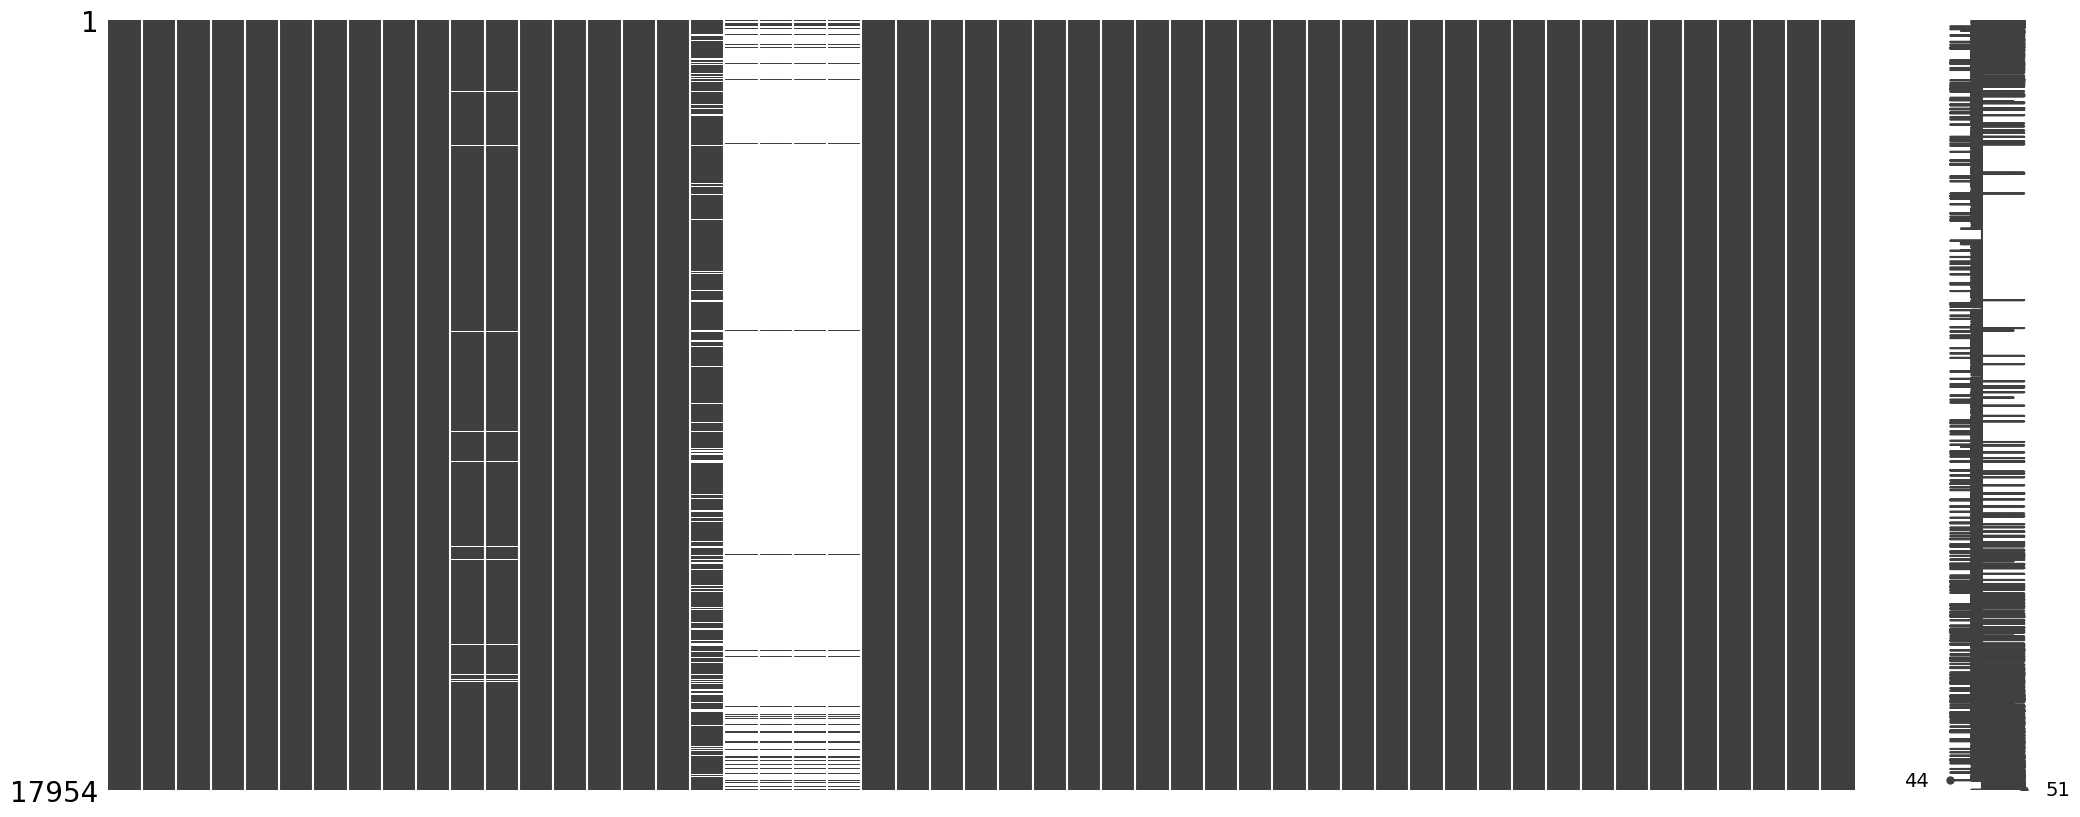

In [7]:
msno.matrix(df)

# ***DATA PREPROCESSING***

Here i checked the number of duplicates if there's any, but apparently there's None

In [8]:
print("Total Number of duplicates:", df.duplicated().sum())

Total Number of duplicates: 0


>Here, I dropped national_jersey_number, national_team_position, national_rating, and national team because it has a significant missing value number, which is 95%

>Also dropped the body type because it is kind of unrealistic; Messi, C. Ronaldo, and others aren't body types.

>Dropped the full name because we already have a column for the name

In [9]:
df['body_type'].unique()

array(['Messi', 'Lean', 'Normal', 'Stocky', 'Courtois',
       'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Shaqiri', 'Neymar',
       'C. Ronaldo'], dtype=object)

In [10]:
df.drop(columns = ['national_jersey_number' , 'national_team_position' , 'national_rating' , 'national_team' ,'body_type','full_name'], inplace = True)


>This fills in missing values in the (wage_euro,release_clause_euro,value_euro) column with the mean (wage,release clause,value) respectively for players with the same overall_rating.






In [11]:
df['wage_euro'] = df['wage_euro'].fillna(df.groupby('overall_rating')['wage_euro'].transform('mean'))
df['release_clause_euro'] = df['release_clause_euro'].fillna(df.groupby('overall_rating')['release_clause_euro'].transform('mean'))
df['value_euro'] = df['value_euro'].fillna(df.groupby('overall_rating')['value_euro'].transform('mean'))

as we can see all the missing values has been handled here

In [12]:
print("\nTotal missing values:", df.isnull().sum().sum())


Total missing values: 0


There's some players that has multiple  positions, so i thought it will be better in the Data Analysis if we have the main position for each player

In [13]:
df['positions'] = df['positions'].str.split(',').str[0]

# ***Explanatory Data Analysis***

## ***Which attributes have the highest correlation with a player's market value?***

### **Importance For Business:**

Real Madrid's approach for making recruitment decisions relies heavily on determining the **market value** of transfer targets. By pinpointing the characteristics that most impact a players market price Real Madrid gains insights into the factors that drive player valuations in football.




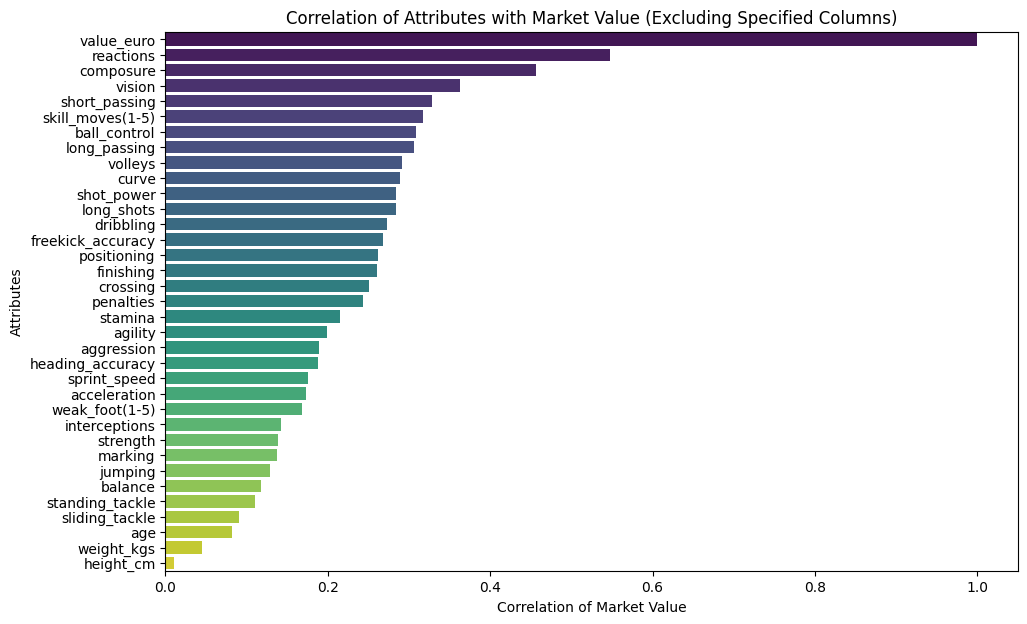

In [14]:
exclude_columns = [ 'release_clause_euro', 'wage_euro',  'international_reputation(1-5)', 'overall_rating', 'potential']

corr = df.drop(columns=exclude_columns).corr(numeric_only=True)['value_euro'].sort_values(ascending=False)

plt.figure(figsize=(11, 7))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, palette='viridis', legend=False)
plt.xlabel('Correlation of Market Value')
plt.ylabel('Attributes')
plt.title('Correlation of Attributes with Market Value (Excluding Specified Columns)')
plt.show()

**Explain the code:**

The code calculate correlations between player characteristics and their market value, excluding columns such as value in euros, release clause in euros and wage in euros. It then illustrates these correlations using a bar graph

**Elaborate the results**:

Upon analysis, attributes like  reactions, composure, vision, and short passing show the highest correlation with a player's market value. have the link to a players market value, These abilities play a role in determining how much a player is valued in the football

**How this answers the original Question:**

By recognizing this information Real Madrid can enhance its recruitment strategy by focusing on players with skills, in reactions, composure, vision and short passing. Prioritizing these attributes ensures targeted recruitment and enhancing competitiveness in the transfer market.




## ***What is the distribution of player positions within the dataset, and how does it vary by nationality?***

### **Importance For Business:**



Real Madrid emphasizes identifying talents from regions known for producing players in various positions. By studying the distribution of player positions based on nationality the team can strategically target recruitment

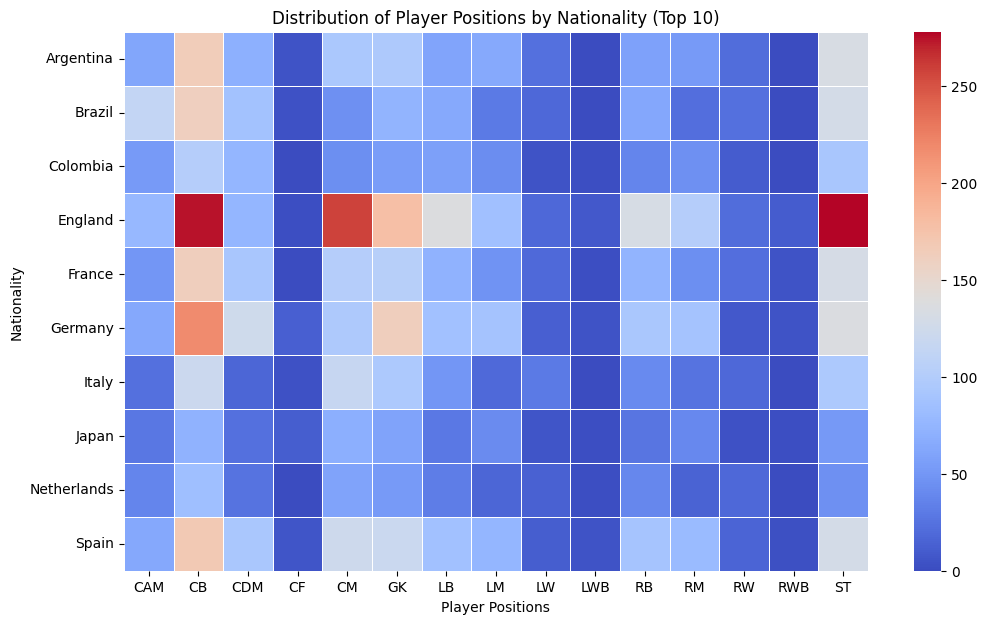

In [15]:
nationality_count = df['nationality'].value_counts()

top_nationalitie = nationality_count.head(10).index

df_top_nationalitie = df[df['nationality'].isin(top_nationalitie)]

position_distribution = df_top_nationalitie.groupby(['nationality', 'positions']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
sns.heatmap(position_distribution, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Distribution of Player Positions by Nationality (Top 10)')
plt.xlabel('Player Positions')
plt.ylabel('Nationality')
plt.show()

**Explain the code:**

Firstly the code starts by counting  the number of players, from each nationality. It then focuses in on the 10 nationalities. It calculates how player positions are distributed within these groups. The resulting heatmap visually represents which player positions are most common among these nationalities.



**Elaborate the results**:


After examining the data a noticeable trend emerges showing a presence of backs (CB) among the top 10 nationalities with England particularly standing out in this regard. Additionally England excels in having a various key positions  of players like midfielders (CM) strikers (ST) goalkeepers (GB) and right backs (RB).


**How this answers the original Question:**


This analysis directly tackles the business question by shedding light on how player positions vary by nationality information for guiding Real Madrids recruitment strategy.
These findings highlight Englands strength in producing talent across roles positionig it as a target for Real Madrids recruitment Efforts.

## ***What is the relationship between player age and their market value, and how does it vary by player position?***

### **Importance For Business:**




Real Madrid makes choices when it comes to signing players focusing on, how player age impacts their market value. considering the club's emphasis on long-term success and financial sustainability, Analyzing this relationship across different player positions provides insights into player recruitment contract negotiations and transfer market strategies.

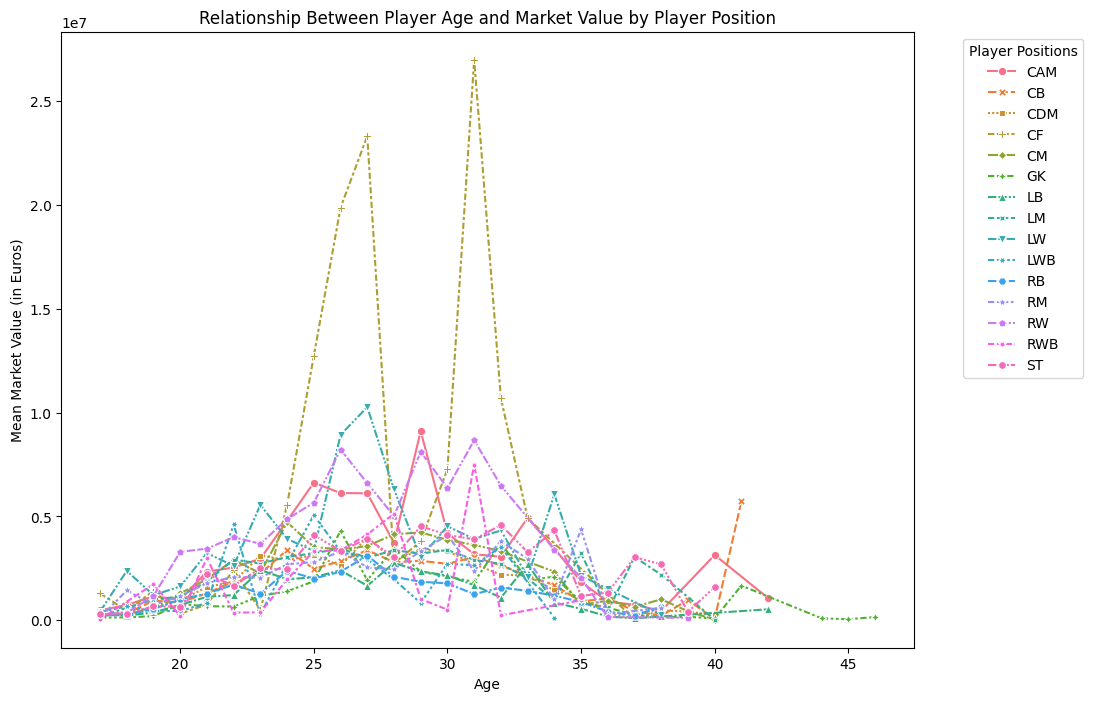

In [16]:
age_position_value = df.groupby(['age', 'positions'])['value_euro'].mean().unstack()

plt.figure(figsize=(11, 8))
sns.lineplot(data=age_position_value, markers=True)
plt.xlabel('Age')
plt.ylabel('Mean Market Value (in Euros)')
plt.title('Relationship Between Player Age and Market Value by Player Position')
plt.legend(title='Player Positions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Explain the code:**

The code first calculates the mean market value for each age group and player position,It then shows this relationship across different player positions using a line plot.

**Elaborate the results**:


After reviewing the trends shown on the charts it's clear that players generally reach their peak market value in their mid to twenties between the ages of 22 and 34. Certain positions, like center forwards (CF) left wingers (LW) strikers (ST) and right wingers (RW) tend to command higher market values compared to others.


On the other hand goalkeepers (GK) usually have lower market values across all age groups. This could be because of the nature of their role, which involves less frequent transfers and typically longer playing careers.


**How this answers the original Question:**

This analysis directly addresses the original business question by providing insights into how player age correlates with market value across positions. Real Madrid can leverage these insights to make informed decisions regarding player acquisitions.


## ***How does the overall rating of players correlate with their weekly wage?***

### **Importance For Business:**




It's important for Real Madrid to consider how players overall ratings relate to their wages. This helps the club make choices during player negotiations making sure that salaries reflect performance and market standards.


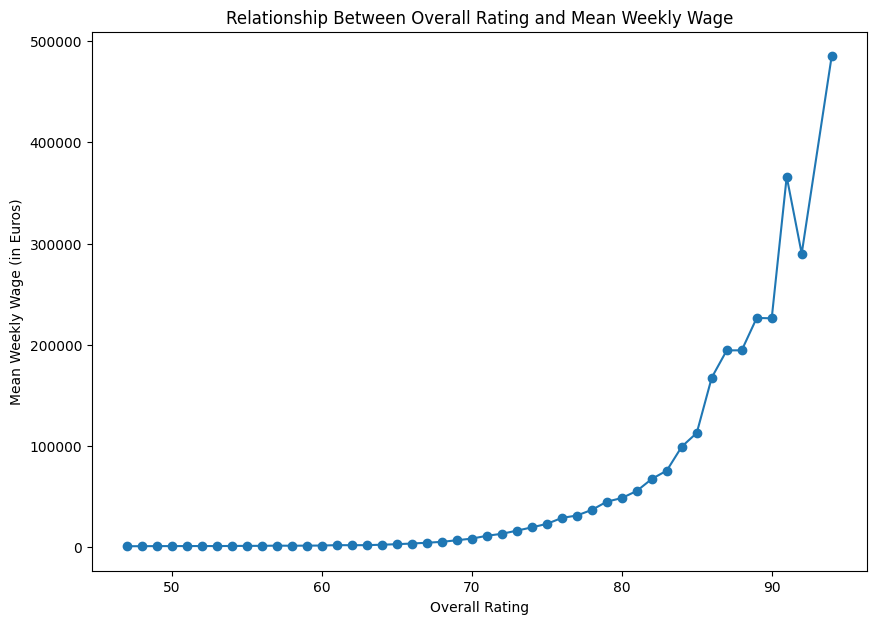

In [17]:
rating_wage_mean = df.groupby('overall_rating')['wage_euro'].mean()

plt.figure(figsize=(10, 7))
plt.plot(rating_wage_mean.index, rating_wage_mean.values, marker='o')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Weekly Wage (in Euros)')
plt.title('Relationship Between Overall Rating and Mean Weekly Wage')
plt.show()

**Explain the code:**

The code calculates the mean weekly wage for players for players at different overall rating levels.it then displays the relationship between rating and the mean weekly wage through a line graph.

**Elaborate the results**:


Upon analysis the data it is apparent that there is a trend in how overall rating relates to average weekly wage. Initially from ratings up to around 70 the average weekly wage show variation. However once an overall rating surpasses 70 there is a rise in weekly wage peaking at approximately 100k euros for players with ratings near 85. Remarkably beyond a rating of 85 there is a surge in mean weekly wage as players start earning wages exceeding 400k euros.


**How this answers the original Question:**


For Real Madrid's player recruitment strategy this analysis provides insights into structuring player salaries according to their performance levels. By aligning player wages with their ratings the club can effectively. Retain top talent while optimizing resource allocation.




## ***What is the distribution of heights and weights among high-rated players across different positions?***

### **Importance For Business:**


Understanding the distribution of heights and weights among high rated players across positions informs recruitment decisions, emphasizing physical attributes tailored to specific positional roles


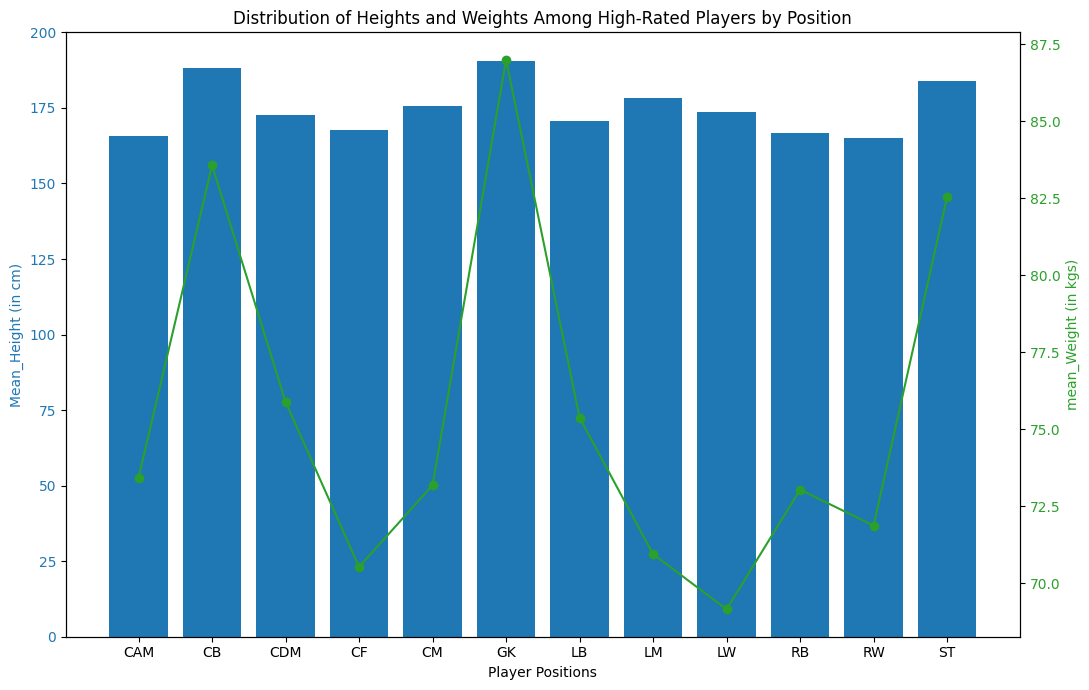

In [18]:
high_rated_players = df[df['overall_rating'] >= 85]

high_rated_position_height_mean = high_rated_players.groupby('positions')['height_cm'].mean()
high_rated_position_weight_mean = high_rated_players.groupby('positions')['weight_kgs'].mean()

fig, axA = plt.subplots(figsize=(11, 7))

Acolor = 'tab:blue'
axA.set_xlabel('Player Positions')
axA.set_ylabel('Mean_Height (in cm)', color=Acolor)
axA.bar(high_rated_position_height_mean.index, high_rated_position_height_mean.values, color=Acolor)
axA.tick_params(axis='y', labelcolor=Acolor)

axB = axA.twinx()
Bcolor = 'tab:green'
axB.set_ylabel('mean_Weight (in kgs)', color=Bcolor)
axB.plot(high_rated_position_weight_mean.index, high_rated_position_weight_mean.values, color=Bcolor, marker='o')
axB.tick_params(axis='y', labelcolor=Bcolor)

plt.title('Distribution of Heights and Weights Among High-Rated Players by Position')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Explain the code:**

The code is filter out players, with rating of 85 or higher, It then calculates the height and weight of these  players based on their positions. The visualization here involves creating bar and line plots to display how player heights and weights are distributed across positions

**Elaborate the results**:

After analyzing this data i notice trends in the characteristics across various player positions. Goalkeepers (GK) and center backs (CB) generally have the heaviest measurements among all positions. This align with their roles that mainly demand presence in challenges. On the other hand center forwards (CF) typically show average heights and weights highlighting the emphasis on speed rather than sheer physicality in their playing style.

**How this answers the original Question:**

this insights guide Real Madrid's player recruitment strategy by focusing more on the importance of attributes in different playing roles in the pitch, For example, prioritizing taller or heavier players for defensive positions ensure defensive resilience




# **FINAL DISCUSSION**

## **Strengths Of The EDA**



>After analyzing the data we've discovered insights related to player characteristics, market values, age trends and positional attributes that can help in making informed decisions


>Key player attributes like reactions, composure, vision and passing exhibit correlations with a players market value. This offers insights that can be applied to recruitment strategies


>Examining player positions has revealed patterns and concentrations. For example there is a dominance of center backs among top nationalities in market values across different positions



## **Limitations Of The EDA**

>columns such as release clause, value and wage contain missing values that were filled using means. This method could introduce bias


>While SoFIFA.com is considered reliable there may be variations, in the accuracy and reliability of the data which could affect the validity of our analysis and recommendations




## **Insights and Implications**

>Understanding player attributes and positional characteristics can guide recruitment strategies for Real Madrid. It can help them identify talents that align with their team dynamics and playing style effectively


>Real Madrid uses factors, like player age, position and skill attributes to make choices about acquiring players, negotiating contracts and making investments



>Realizing that younger players have potential while older ones decline over time highlights the need to invest in talent development programs and scout promising talents, for long term success.


## **Data-Driven Recommendations**

>To get the results and performance, on the field it's important to recruit players who excel in attributes tied to their market value like reactions, composure, and great vision.



>When building the squad it should take into account market trends for positions and value differences. This way the club can ensure a team that meets all positional needs effectively.










